In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset
pd.set_option("display.max_columns", None)

# Import psql to run queries 
import pandasql as psql

In [2]:
reports = pd.read_csv(r"C:\Users\Dinesh Kumar\Desktop\Internship\database.csv", header=0)
reports_bk=reports.copy()
reports_bk.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [3]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [4]:
reports.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [5]:
reports.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [6]:
#statistical measures about data
reports.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [1]:
reports['Crime Solved'].value_counts()

NameError: name 'reports' is not defined

In [8]:
reports['Crime Solved']=reports['Crime Solved'].replace('Yes','1')
reports['Crime Solved']=reports['Crime Solved'].replace('No','0')
reports['Crime Solved']=reports['Crime Solved'].astype(int)
reports['Perpetrator Age']=reports['Perpetrator Age'].replace(' ','0')
reports['Perpetrator Age']=reports['Perpetrator Age'].astype(int)

In [9]:
#count target or dependent variable by 0 & 1
reports_count=reports['Crime Solved'].value_counts()
print('Class 0:',reports_count[0])
print('Class 1:',reports_count[1])
print('Proportion:',round(reports_count[0]/reports_count[1],2),':1')
print('Total records:',len(reports))

Class 0: 190282
Class 1: 448172
Proportion: 0.42 :1
Total records: 638454


In [10]:
reports

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,1,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,1,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,1,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,0,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,1,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,1,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,1,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


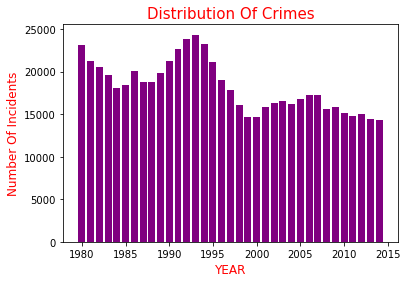

In [11]:
#data visualization using bar graph
reports['Year'].value_counts()
a=reports['Year'].value_counts().keys()
b=reports['Year'].value_counts().tolist()
plt.bar(a,b,color='purple')
plt.title('Distribution Of Crimes',color='red',size=15)
plt.xlabel('YEAR',color='red',size=12)
plt.ylabel('Number Of Incidents',color='red',size=12)
plt.show()

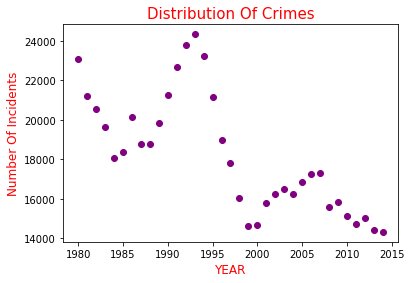

In [12]:
#data visualization using scatterplot
plt.scatter(a,b,color='purple')
plt.title('Distribution Of Crimes',color='red',size=15)
plt.xlabel('YEAR',color='red',size=12)
plt.ylabel('Number Of Incidents',color='red',size=12)
plt.show()

In [13]:
reports['Incident'].value_counts()

1      265528
2       71779
3       39236
4       27113
5       20658
        ...  
679        16
678        16
675        16
674        16
0          16
Name: Incident, Length: 1000, dtype: int64

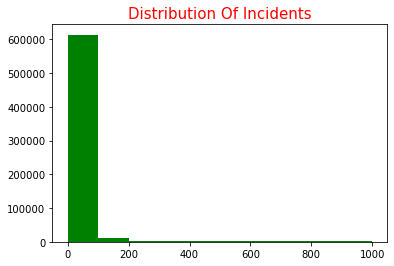

In [14]:
#data visualization using histogram
plt.hist(reports['Incident'],color='green')
plt.title('Distribution Of Incidents',color='red',size=15)
plt.show()

In [15]:
del reports['Record ID']

In [16]:
#use label encoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
reports['Agency Name']=LE.fit_transform(reports[['Agency Name']])
reports['Agency Code']=LE.fit_transform(reports[['Agency Code']])
reports['Agency Type']=LE.fit_transform(reports[['Agency Type']])
reports['City']=LE.fit_transform(reports[['City']])
reports['State']=LE.fit_transform(reports[['State']])
reports['Month']=LE.fit_transform(reports[['Month']])
reports['Crime Type']=LE.fit_transform(reports[['Crime Type']])
reports['Victim Sex']=LE.fit_transform(reports[['Victim Sex']])
reports['Victim Race']=LE.fit_transform(reports[['Victim Race']])
reports['Victim Ethnicity']=LE.fit_transform(reports[['Victim Ethnicity']])
reports['Perpetrator Sex']=LE.fit_transform(reports[['Perpetrator Sex']])
reports['Perpetrator Race']=LE.fit_transform(reports[['Perpetrator Race']])
reports['Perpetrator Ethnicity']=LE.fit_transform(reports[['Perpetrator Ethnicity']])
reports['Relationship']=LE.fit_transform(reports[['Relationship']])
reports['Record Source']=LE.fit_transform(reports[['Record Source']])
reports['Weapon']=LE.fit_transform(reports[['Weapon']])

In [17]:
reports

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,0,149,1,35,1,1980,4,1,1,1,1,14,2,2,1,15,2,2,0,0,0,0,0
1,0,149,1,35,1,1980,7,1,1,1,1,43,4,2,1,42,4,2,0,13,0,0,0
2,0,149,1,35,1,1980,7,2,1,0,0,30,2,2,2,0,3,2,26,15,0,0,0
3,0,149,1,35,1,1980,0,1,1,1,1,43,4,2,1,42,4,2,0,13,0,0,0
4,0,149,1,35,1,1980,0,2,1,0,0,30,2,2,2,0,3,2,26,15,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,11982,5753,3,1211,50,2014,4,1,1,0,1,30,4,0,2,0,3,2,26,8,0,0,0
638450,11987,6898,3,1459,50,2014,6,1,1,1,1,62,4,2,1,57,4,2,0,8,0,0,0
638451,11988,6897,1,1459,50,2014,11,1,1,1,0,0,0,2,0,22,0,2,6,14,0,0,0
638452,11989,7939,3,1534,50,2014,2,1,1,1,1,55,4,1,1,31,4,1,25,9,0,1,0


In [18]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in reports.columns:
    if col != 'Crime Solved':
        IndepVar.append(col)

TargetVar = 'Crime Solved'

x = reports[IndepVar]
y = reports[TargetVar]

In [19]:
x

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,0,149,1,35,1,1980,4,1,1,1,14,2,2,1,15,2,2,0,0,0,0,0
1,0,149,1,35,1,1980,7,1,1,1,43,4,2,1,42,4,2,0,13,0,0,0
2,0,149,1,35,1,1980,7,2,1,0,30,2,2,2,0,3,2,26,15,0,0,0
3,0,149,1,35,1,1980,0,1,1,1,43,4,2,1,42,4,2,0,13,0,0,0
4,0,149,1,35,1,1980,0,2,1,0,30,2,2,2,0,3,2,26,15,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,11982,5753,3,1211,50,2014,4,1,1,1,30,4,0,2,0,3,2,26,8,0,0,0
638450,11987,6898,3,1459,50,2014,6,1,1,1,62,4,2,1,57,4,2,0,8,0,0,0
638451,11988,6897,1,1459,50,2014,11,1,1,0,0,0,2,0,22,0,2,6,14,0,0,0
638452,11989,7939,3,1534,50,2014,2,1,1,1,55,4,1,1,31,4,1,25,9,0,1,0


In [20]:
y

0         1
1         1
2         0
3         1
4         0
         ..
638449    0
638450    1
638451    1
638452    1
638453    1
Name: Crime Solved, Length: 638454, dtype: int32

In [21]:
#Random oversampling can be implemented using RandomOverSampler class
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.5)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape)

(672258, 22)
(672258,)


In [22]:
reports

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,0,149,1,35,1,1980,4,1,1,1,1,14,2,2,1,15,2,2,0,0,0,0,0
1,0,149,1,35,1,1980,7,1,1,1,1,43,4,2,1,42,4,2,0,13,0,0,0
2,0,149,1,35,1,1980,7,2,1,0,0,30,2,2,2,0,3,2,26,15,0,0,0
3,0,149,1,35,1,1980,0,1,1,1,1,43,4,2,1,42,4,2,0,13,0,0,0
4,0,149,1,35,1,1980,0,2,1,0,0,30,2,2,2,0,3,2,26,15,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,11982,5753,3,1211,50,2014,4,1,1,0,1,30,4,0,2,0,3,2,26,8,0,0,0
638450,11987,6898,3,1459,50,2014,6,1,1,1,1,62,4,2,1,57,4,2,0,8,0,0,0
638451,11988,6897,1,1459,50,2014,11,1,1,1,0,0,0,2,0,22,0,2,6,14,0,0,0
638452,11989,7939,3,1534,50,2014,2,1,1,1,1,55,4,1,1,31,4,1,25,9,0,1,0


In [23]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y, random_state = 42)
x.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape

((638454, 22), (446917, 22), (446917,), (191537, 22), (191537,))

In [24]:
cols1=['City','Year','Victim Age','Perpetrator Age']

In [25]:
# Scaling the features by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [26]:
HTResults=pd.read_csv(r"C:\Users\Dinesh Kumar\Desktop\Internship\HTResults.csv")
HTResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[130348   4104]
 [  6824  50261]]
Outcome values : 
 130348 4104 6824 50261
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96    134452
           0       0.92      0.88      0.90     57085

    accuracy                           0.94    191537
   macro avg       0.94      0.92      0.93    191537
weighted avg       0.94      0.94      0.94    191537

Accuracy : 94.3 %
Precision : 95.0 %
Recall : 96.9 %
F1 Score : 0.96
Specificity or True Negative Rate : 88.0 %
Balanced Accuracy : 92.4 %
roc_auc_score: 0.925


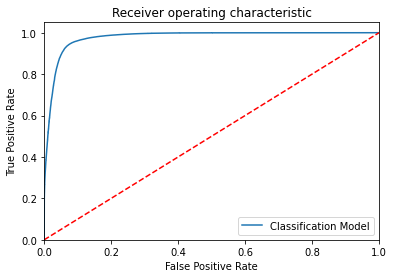

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[134392     60]
 [    61  57024]]
Outcome values : 
 134392 60 61 57024
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    134452
           0       1.00      1.00      1.00     57085

    accuracy                           1.00    191537
   macro avg       1.00      1.00      1.00    191537
weighted avg       1.00      1.00      1.00    191537

Accuracy : 99.9 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
roc_auc_score: 0.999


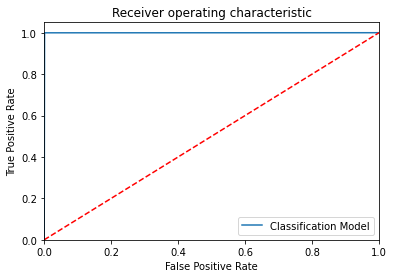

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[134404     48]
 [    44  57041]]
Outcome values : 
 134404 48 44 57041
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    134452
           0       1.00      1.00      1.00     57085

    accuracy                           1.00    191537
   macro avg       1.00      1.00      1.00    191537
weighted avg       1.00      1.00      1.00    191537

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
roc_auc_score: 0.999


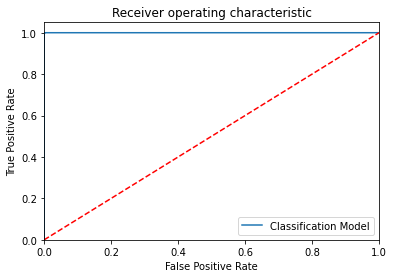

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[134405     47]
 [    46  57039]]
Outcome values : 
 134405 47 46 57039
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    134452
           0       1.00      1.00      1.00     57085

    accuracy                           1.00    191537
   macro avg       1.00      1.00      1.00    191537
weighted avg       1.00      1.00      1.00    191537

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
roc_auc_score: 0.999


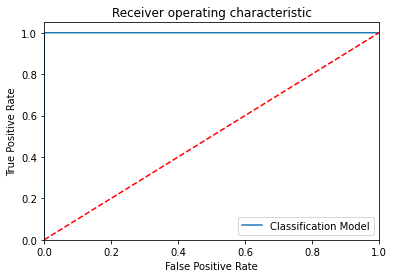

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[124349  10103]
 [  8244  48841]]
Outcome values : 
 124349 10103 8244 48841
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.92      0.93    134452
           0       0.83      0.86      0.84     57085

    accuracy                           0.90    191537
   macro avg       0.88      0.89      0.89    191537
weighted avg       0.91      0.90      0.90    191537

Accuracy : 90.4 %
Precision : 93.8 %
Recall : 92.5 %
F1 Score : 0.931
Specificity or True Negative Rate : 85.6 %
Balanced Accuracy : 89.1 %
roc_auc_score: 0.89


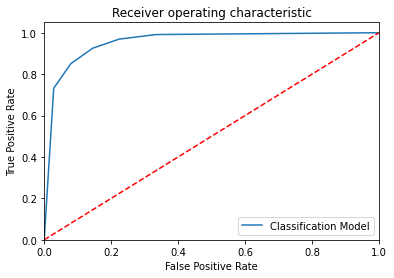

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[134404     48]
 [    52  57033]]
Outcome values : 
 134404 48 52 57033
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    134452
           0       1.00      1.00      1.00     57085

    accuracy                           1.00    191537
   macro avg       1.00      1.00      1.00    191537
weighted avg       1.00      1.00      1.00    191537

Accuracy : 99.9 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
roc_auc_score: 0.999


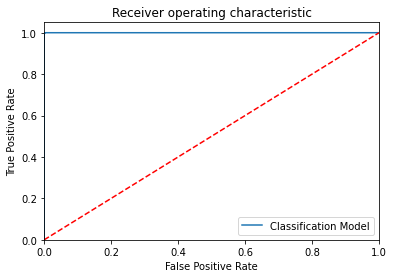

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[134403     49]
 [    21  57064]]
Outcome values : 
 134403 49 21 57064
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    134452
           0       1.00      1.00      1.00     57085

    accuracy                           1.00    191537
   macro avg       1.00      1.00      1.00    191537
weighted avg       1.00      1.00      1.00    191537

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


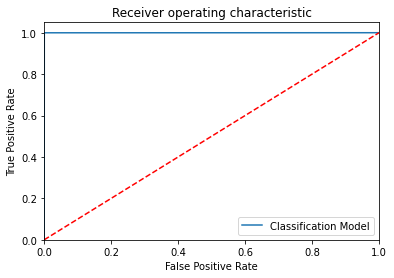

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[134404     48]
 [    47  57038]]
Outcome values : 
 134404 48 47 57038
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    134452
           0       1.00      1.00      1.00     57085

    accuracy                           1.00    191537
   macro avg       1.00      1.00      1.00    191537
weighted avg       1.00      1.00      1.00    191537

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
roc_auc_score: 0.999


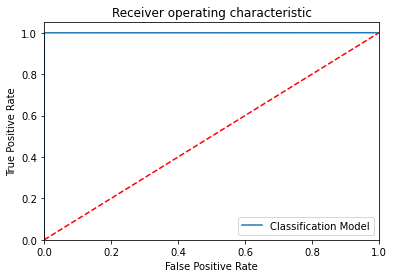

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[134403     49]
 [  1189  55896]]
Outcome values : 
 134403 49 1189 55896
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00    134452
           0       1.00      0.98      0.99     57085

    accuracy                           0.99    191537
   macro avg       1.00      0.99      0.99    191537
weighted avg       0.99      0.99      0.99    191537

Accuracy : 99.4 %
Precision : 99.1 %
Recall : 100.0 %
F1 Score : 0.995
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 99.0 %
roc_auc_score: 0.989


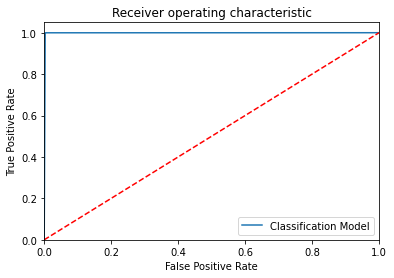

-----------------------------------------------------------------------------------------------------


In [27]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
     #Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    HTResults = HTResults.append(new_row, ignore_index=True)

In [28]:
HTResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),130348,4104,6824,50261,0.943,0.950,0.969,0.960,0.880,4.737,0.924968,0.924
1,DecisionTreeClassifier(),134392,60,61,57024,0.999,1.000,1.000,1.000,0.999,4.057,0.999243,1.000
2,"(DecisionTreeClassifier(max_features='sqrt', r...",134404,48,44,57041,1.000,1.000,1.000,1.000,0.999,4.057,0.999436,1.000
3,"(ExtraTreeClassifier(random_state=1260847473),...",134405,47,46,57039,1.000,1.000,1.000,1.000,0.999,4.058,0.999422,1.000
4,KNeighborsClassifier(),124349,10103,8244,48841,0.904,0.938,0.925,0.931,0.856,2.779,0.890221,0.891
5,(DecisionTreeClassifier(random_state=828545962...,134404,48,52,57033,0.999,1.000,1.000,1.000,0.999,4.059,0.999366,1.000
6,([DecisionTreeRegressor(criterion='friedman_ms...,134403,49,21,57064,1.000,1.000,1.000,1.000,1.000,4.051,0.999634,1.000
7,LGBMClassifier(),134404,48,47,57038,1.000,1.000,1.000,1.000,0.999,4.058,0.999410,1.000
8,GaussianNB(),134403,49,1189,55896,0.994,0.991,1.000,0.995,0.979,4.426,0.989403,0.990
